# Introduction to neural networks with TF

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another

A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)


In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now ... let's visualize it 

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


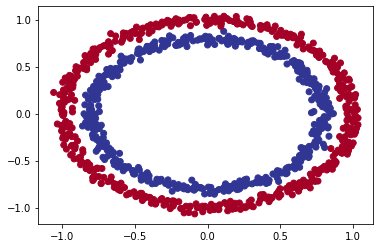

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working 
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and lables
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate
7. Tweak
8. Evaluate ...

In [9]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5, verbose=1)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4820


In [10]:
# Let's try and improve our model by training for longer ...
model_1.fit(X, y, epochs=200, verbose=0)

In [11]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy ... it's performing as it is guessing. 

So let's step things up a nothch and add extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=200, verbose=0)

In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999989509583, 0.5]

In [14]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improve our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. Fitting the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls).

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """Plots the decision boundary created by a model predicting on X.
    This function was inspired by:
    1. cs231 course on CNN. There you can find a
    similar function, spiral. https://cs231n.github.io/convolutional-networks/#convert
    
    2. Second resource is madeforML, multilayer perceptor.
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    #Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 4ms/step
doing binary classification


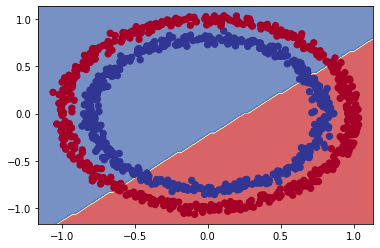

In [18]:
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

Let's see if our model can be used for a regression problem ...

In [19]:
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [20]:
# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit oour model to the regression data

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=2)

Epoch 1/100


ValueError: in user code:

    File "c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\engine\input_spec.py", line 249, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer "sequential_2" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


We complied our model for a binary classification problem. 

But...we're now working on a regression problem, let's change the model to suit our data.

In [21]:
y_reg_train

<tf.Tensor: shape=(150,), dtype=int32, numpy=
array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290,
       295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355,
       360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420,
       425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485,
       490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550,
       555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615,
       620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680,
       685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745,
       750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
       815, 820, 825, 830, 835, 840, 845])>

In [22]:
# Set up random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 4ms/step - loss: 38.8398 - mae: 38.8398
Epoch 88/100
5/5 [==============================] - 0s 3ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 4ms/step - loss: 38.7559 - mae: 38.7559
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 38.5442 - mae: 38.5442
Epoch 91/100
5/5 [==============================] - 0s 4ms/step - loss: 38.3247 - mae: 38.3247
Epoch 92/100
5/5 [==============================] - 0s 3ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 4ms/step - loss: 39.1137 - mae: 39.1137
Epoch 94/100
5/5 [==============================] - 0s 4ms/step - loss: 38.1463 - mae: 38.1463
Epoch 95/100
5/5 [==============================] - 0s 3ms/step - loss: 38.3998 - mae: 38.3998
Epoch 96/100
5/5 [==============================] - 0s 3ms/step - loss: 38.5599 - mae: 38.5599
Epoch 97/100
5/5 [==============================] - 0s 4ms/step

2/2 [==============================] - 0s 7ms/step


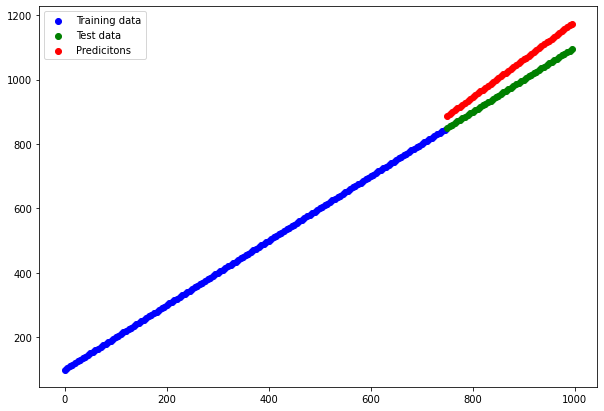

In [23]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predicitons")
plt.legend();

## The missing piece: Non-linearity

In [24]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics="accuracy")

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100


c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 3.7419 - accuracy: 0.4220
Epoch 11/100
32/32 [=

32/32 [==============================] - 0s 5ms/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7136 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7128 - accuracy: 0.4910
Epoch 92/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7120 - accuracy: 0.4900
Epoch 93/100


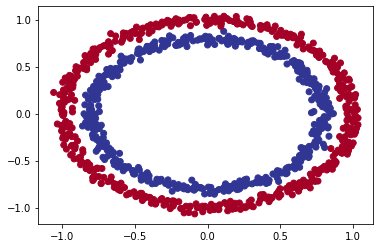

In [25]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


313/313 [==============================] - 1s 2ms/step
doing binary classification


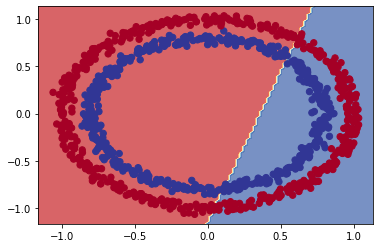

In [26]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                      X=X,
                      y=y)

Let's try build our first neural network with a non-linear activation function

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model with non-linear
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics="accuracy")

# 3. Fit the model
model_6.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7419 - accuracy: 0.4220
Epoch 11/

32/32 [==============================] - 0s 5ms/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7136 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7128 - accuracy: 0.4910
Epoch 92/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7120 - accuracy: 0.4900
Epoch 93/100


313/313 [==============================] - 1s 4ms/step
doing binary classification


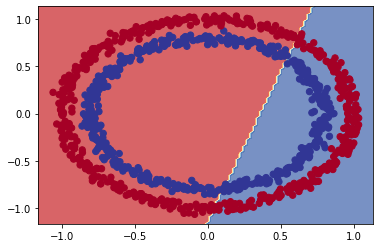

In [28]:
# Check the decision boundary for our model
plot_decision_boundary(model=model_6,
                      X=X,
                      y=y)

In [29]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create de model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu")
])

#2. Complie the model
model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

# 3. Fit the  model
history = model_7.fit(X, y, epochs= 1000)

Epoch 1/1000
32/32 [==============================] - 1s 3ms/step - loss: 2.3938 - accuracy: 0.1910
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.7922 - accuracy: 0.1850
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.4365 - accuracy: 0.1910
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.2626 - accuracy: 0.1990
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.1758 - accuracy: 0.2030
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.0821 - accuracy: 0.2080
Epoch 7/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.8747 - accuracy: 0.2660
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.8439 - accuracy: 0.2860
Epoch 9/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.8313 - accuracy: 0.2870
Epoch 10/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.8206 - accuracy: 0.2890

32/32 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.3150
Epoch 83/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.3100
Epoch 84/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.2950
Epoch 85/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.2950
Epoch 86/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.2960
Epoch 87/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.3010
Epoch 88/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.3050
Epoch 89/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.2970
Epoch 90/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.3000
Epoch 91/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.2850
Epoc

32/32 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.2060
Epoch 163/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.1980
Epoch 164/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.2030
Epoch 165/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.1830
Epoch 166/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.1830
Epoch 167/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4950 - accuracy: 0.1670
Epoch 168/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4913 - accuracy: 0.1850
Epoch 169/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4876 - accuracy: 0.1830
Epoch 170/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.1720
Epoch 171/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.2517 - accuracy: 0.1540
Epoch 243/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2490 - accuracy: 0.1730
Epoch 244/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.2070
Epoch 245/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.1810
Epoch 246/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2424 - accuracy: 0.1590
Epoch 247/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.1940
Epoch 248/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.2080
Epoch 249/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.2040
Epoch 250/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.2270
Epoch 251/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.4300
Epoch 323/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1350 - accuracy: 0.4180
Epoch 324/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.4480
Epoch 325/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.4330
Epoch 326/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.4380
Epoch 327/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.4300
Epoch 328/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1309 - accuracy: 0.4350
Epoch 329/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1298 - accuracy: 0.4410
Epoch 330/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1296 - accuracy: 0.4340
Epoch 331/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.4710
Epoch 403/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.4760
Epoch 404/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.4590
Epoch 405/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0754 - accuracy: 0.4530
Epoch 406/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.4700
Epoch 407/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.4630
Epoch 408/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.4700
Epoch 409/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.4820
Epoch 410/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0730 - accuracy: 0.4860
Epoch 411/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0735 - accuracy: 0.

32/32 [==============================] - 0s 5ms/step - loss: 0.0476 - accuracy: 0.4090
Epoch 483/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0475 - accuracy: 0.3920
Epoch 484/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0474 - accuracy: 0.4060
Epoch 485/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.4080
Epoch 486/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0468 - accuracy: 0.3950
Epoch 487/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0463 - accuracy: 0.4030
Epoch 488/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.3970
Epoch 489/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.4020
Epoch 490/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.4050
Epoch 491/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0454 - accuracy: 0.

32/32 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.4260
Epoch 563/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.4210
Epoch 564/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.4360
Epoch 565/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.4220
Epoch 566/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.4690
Epoch 567/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.4410
Epoch 568/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.4520
Epoch 569/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.4460
Epoch 570/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.4410
Epoch 571/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.

32/32 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.4880
Epoch 643/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.5060
Epoch 644/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.4670
Epoch 645/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.4860
Epoch 646/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0255 - accuracy: 0.4660
Epoch 647/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0248 - accuracy: 0.4720
Epoch 648/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0250 - accuracy: 0.5110
Epoch 649/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.4880
Epoch 650/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0253 - accuracy: 0.4860
Epoch 651/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0249 - accuracy: 0.

32/32 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.6110
Epoch 723/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.5120
Epoch 724/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.4720
Epoch 725/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.5150
Epoch 726/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.4980
Epoch 727/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.4890
Epoch 728/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0205 - accuracy: 0.5140
Epoch 729/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.5070
Epoch 730/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0205 - accuracy: 0.4750
Epoch 731/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.

32/32 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.4710
Epoch 803/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.5200
Epoch 804/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.4900
Epoch 805/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.4760
Epoch 806/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.5260
Epoch 807/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0174 - accuracy: 0.5830
Epoch 808/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 0.5010
Epoch 809/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.4810
Epoch 810/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0175 - accuracy: 0.4690
Epoch 811/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0180 - accuracy: 0.

32/32 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 0.5490
Epoch 883/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0157 - accuracy: 0.5150
Epoch 884/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0153 - accuracy: 0.4750
Epoch 885/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0154 - accuracy: 0.5360
Epoch 886/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 0.5270
Epoch 887/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 0.5530
Epoch 888/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.4900
Epoch 889/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0156 - accuracy: 0.5420
Epoch 890/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0156 - accuracy: 0.5160
Epoch 891/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 0.

32/32 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.4790
Epoch 963/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.4950
Epoch 964/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.4660
Epoch 965/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.5270
Epoch 966/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.4930
Epoch 967/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 0.4950
Epoch 968/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.5500
Epoch 969/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.4690
Epoch 970/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.4840
Epoch 971/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.

In [30]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.4680


[0.012379320338368416, 0.46799999475479126]

313/313 [==============================] - 1s 3ms/step
doing multiclass classification


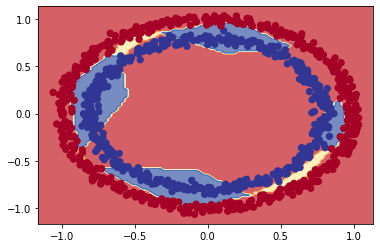

In [31]:
# How do our model predictions look?
plot_decision_boundary(model_7, X, y)

In [32]:
# Improve the multi-layer neural network from playground

# Set the random seed
tf.random.set_seed(42)

# 1. create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history= model_8.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

32/32 [==============================] - 0s 6ms/step - loss: 0.4360 - accuracy: 0.9630
Epoch 84/250
32/32 [==============================] - 0s 5ms/step - loss: 0.4260 - accuracy: 0.9690
Epoch 85/250
32/32 [==============================] - 0s 7ms/step - loss: 0.4145 - accuracy: 0.9700
Epoch 86/250
32/32 [==============================] - 0s 6ms/step - loss: 0.4059 - accuracy: 0.9740
Epoch 87/250
32/32 [==============================] - 0s 5ms/step - loss: 0.3962 - accuracy: 0.9750
Epoch 88/250
32/32 [==============================] - 0s 7ms/step - loss: 0.3873 - accuracy: 0.9720
Epoch 89/250
32/32 [==============================] - 0s 6ms/step - loss: 0.3795 - accuracy: 0.9750
Epoch 90/250
32/32 [==============================] - 0s 6ms/step - loss: 0.3716 - accuracy: 0.9750
Epoch 91/250
32/32 [==============================] - 0s 5ms/step - loss: 0.3635 - accuracy: 0.9840
Epoch 92/250
32/32 [==============================] - 0s 5ms/step - loss: 0.3554 - accuracy: 0.9830
Epoch 93/250


32/32 [==============================] - 0s 6ms/step - loss: 0.1031 - accuracy: 0.9930
Epoch 165/250
32/32 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.9890
Epoch 166/250
32/32 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.9930
Epoch 167/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0996 - accuracy: 0.9930
Epoch 168/250
32/32 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.9920
Epoch 169/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0970 - accuracy: 0.9930
Epoch 170/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0959 - accuracy: 0.9920
Epoch 171/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0949 - accuracy: 0.9920
Epoch 172/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0937 - accuracy: 0.9920
Epoch 173/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0926 - accuracy: 0.9930
Epoc

32/32 [==============================] - 0s 5ms/step - loss: 0.0487 - accuracy: 0.9940
Epoch 246/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0483 - accuracy: 0.9930
Epoch 247/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.9950
Epoch 248/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0475 - accuracy: 0.9930
Epoch 249/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0471 - accuracy: 0.9950
Epoch 250/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0471 - accuracy: 0.9940


In [33]:
# Evaluate the model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9920


[0.045933641493320465, 0.9919999837875366]

313/313 [==============================] - 1s 2ms/step
doing binary classification


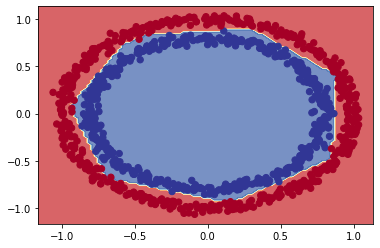

In [34]:
# Plot the prediction model
plot_decision_boundary(model_8, X, y)

**Note:** The combination of **linear (straight lines)** and **non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we're discussed the concept of linear and non-linear functons (or lines), let's see them in action.

In [35]:
# Create a toy tensor (similar to the data we pass into our model)

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

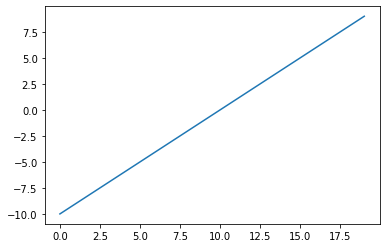

In [36]:
# Visualize our toy tensor
plt.plot(A);

In [37]:
# Let's start by replicationg sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def mySigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor

mySigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

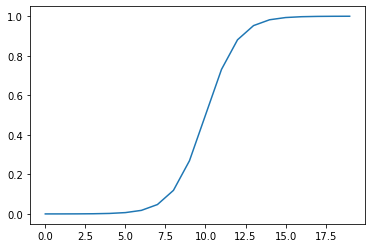

In [38]:
# Plot our toy tensor transformed by sigmoid

plt.plot(mySigmoid(A));

In [39]:
# Let's recreate the relu function

def myRelu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom function
myRelu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

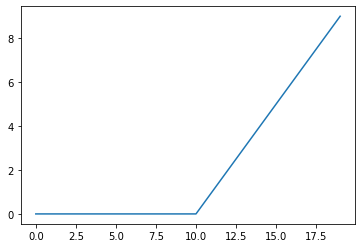

In [40]:
# Plot our tensor transformed by the custom function
plt.plot(myRelu(A));

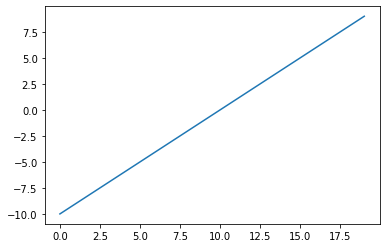

In [41]:
plt.plot(A);

In [42]:
# Let's try the hyperbolic tangential function 
# tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x)))

# Create the custom function, hyperbolic tangential: 

def myTanh(x):
    return (tf.exp(x) - (tf.exp(-x)))/(tf.exp(x) + (tf.exp(-x)))

# Pass our toy tensor to the custom function
myTanh(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ],
      dtype=float32)>

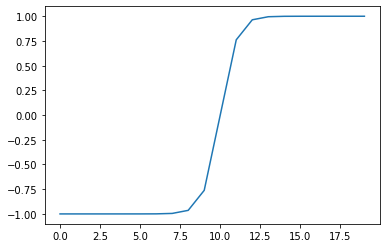

In [43]:
#Plot our transformed tensor with the custom function
plt.plot(myTanh(A));

In [44]:
# Let's try the linear activation function

B = tf.keras.activations.linear(A)
B

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

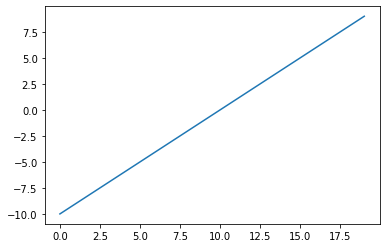

In [45]:
# Does the linear activation function change anything?

plt.plot(B);

In [46]:
# Does A even change?

A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

So far we're been training and testingon the same dataset ...

However, in machine learning this is bassically a sin.

So let's create a training and test set.

In [47]:
# Check how many examples we have
len(X)

1000

In [48]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [49]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=["accuracy"])

# 3. Fit the model
hiytory = model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [50]:
# 4. Evaluate the model on the test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468855082988739, 1.0]

313/313 [==============================] - 1s 4ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


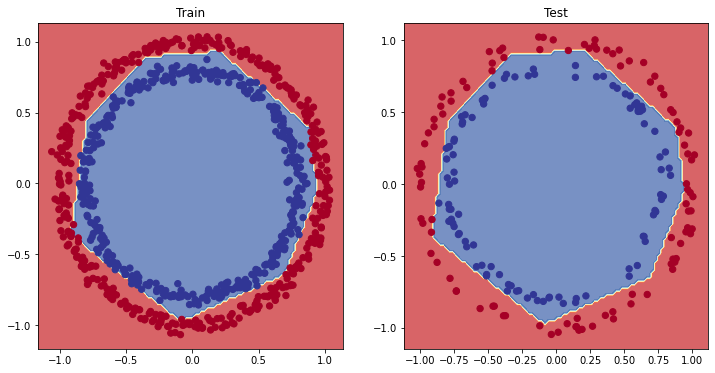

In [51]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show();

In [52]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4)                 12        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curves

In [53]:
history.history

{'loss': [0.6891202330589294,
  0.6848356127738953,
  0.6824287176132202,
  0.6813334226608276,
  0.680156409740448,
  0.6794118285179138,
  0.6785022020339966,
  0.6778489947319031,
  0.6772070527076721,
  0.6765892505645752,
  0.6760299205780029,
  0.675374448299408,
  0.6747077703475952,
  0.6741397976875305,
  0.673419177532196,
  0.6727023124694824,
  0.67218017578125,
  0.6716141700744629,
  0.6709817051887512,
  0.6702422499656677,
  0.6696376204490662,
  0.6688393354415894,
  0.6682179570198059,
  0.6678821444511414,
  0.6671321988105774,
  0.6661693453788757,
  0.66571044921875,
  0.6644943356513977,
  0.6641736626625061,
  0.6634045839309692,
  0.6626854538917542,
  0.6619408130645752,
  0.6610139608383179,
  0.6605863571166992,
  0.6597086191177368,
  0.658636212348938,
  0.657951295375824,
  0.657325029373169,
  0.6563595533370972,
  0.6556102633476257,
  0.6547687649726868,
  0.6539933681488037,
  0.652955949306488,
  0.652129054069519,
  0.6495609283447266,
  0.6480515003

In [54]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.689120,0.502
1,0.684836,0.517
2,0.682429,0.516
3,0.681333,0.530
4,0.680156,0.539
...,...,...
245,0.048275,0.993
246,0.047893,0.995
247,0.047540,0.993
248,0.047134,0.995


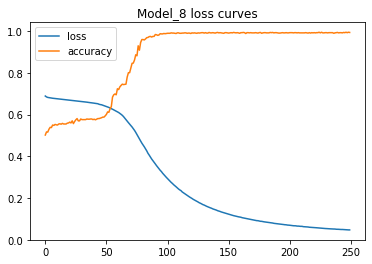

In [55]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during traing) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here).
* A modified loss curves plot.

In [56]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model 9)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# 2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model passing lr_scheduler callback
history = model_10.fit(X_train,
                       y_train,
                       epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1545 - accuracy: 0.9400 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1154 - accuracy: 0.9600 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7185 - accuracy: 0.7638 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.6100 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5892 - accuracy: 0.6687 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5982 - accuracy: 0.6400 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6440 - accuracy: 0.6112 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6303 - accuracy: 0.5925 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6627 - accuracy: 0.5

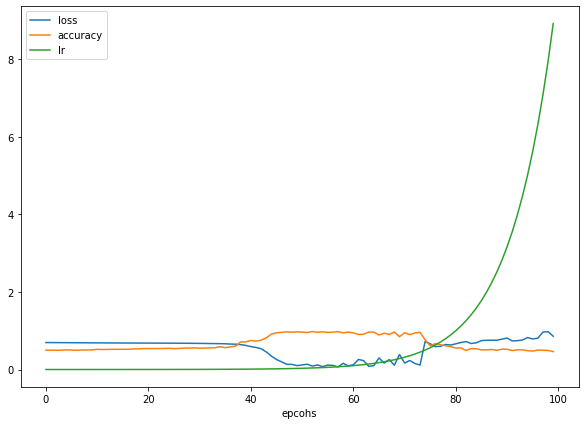

In [57]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epcohs");

In [58]:
# Plot the learning rate vs the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [59]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs Loss')

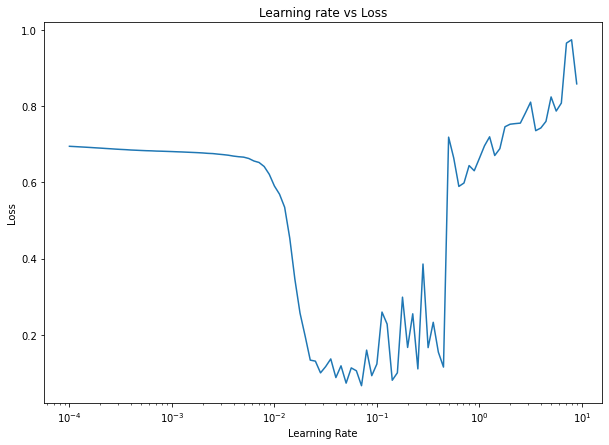

In [60]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [61]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [62]:
# Creating a model with the learning rate lr= 0.007

# set the raandom seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.007),
                metrics=["accuracy"])

# 3. Fit the model
history = model_11.fit(X_train,
                         y_train,
                         epochs=100)

Epoch 1/100


c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6854 - accuracy: 0.5138
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5700
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5562
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.5587
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.5663
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.5625
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.5650
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.5713
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.6350
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.6825
Epoch 11/100
25/25 [=

25/25 [==============================] - 0s 5ms/step - loss: 0.0461 - accuracy: 0.9900
Epoch 84/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0464 - accuracy: 0.9912
Epoch 85/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0521 - accuracy: 0.9850
Epoch 86/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0452 - accuracy: 0.9937
Epoch 87/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0463 - accuracy: 0.9900
Epoch 88/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.9887
Epoch 89/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0421 - accuracy: 0.9950
Epoch 90/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0469 - accuracy: 0.9875
Epoch 91/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0434 - accuracy: 0.9900
Epoch 92/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0443 - accuracy: 0.9900
Epoch 93/100


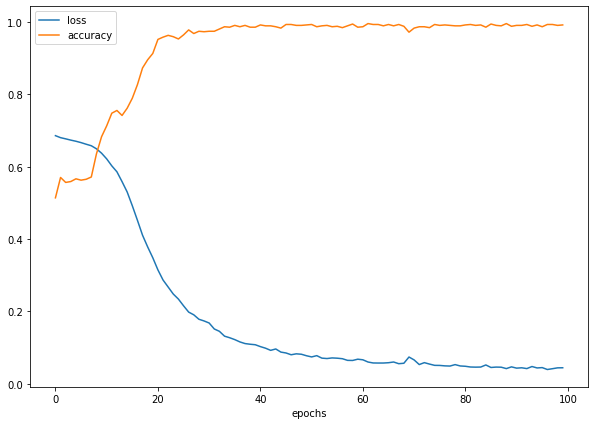

In [63]:
# checkout the learning rate
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

In [64]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with the ideal learning rate
model_12.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

# 3. Fit the model for 20 epochs
history_12 = model_12.fit(X_train, y_train, epochs=20)

Epoch 1/20


c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [65]:
# Evaluate model 12 on the test dataset
model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401809841394424, 0.9900000095367432]

In [66]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468855082988739, 1.0]

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 4ms/step
doing binary classification


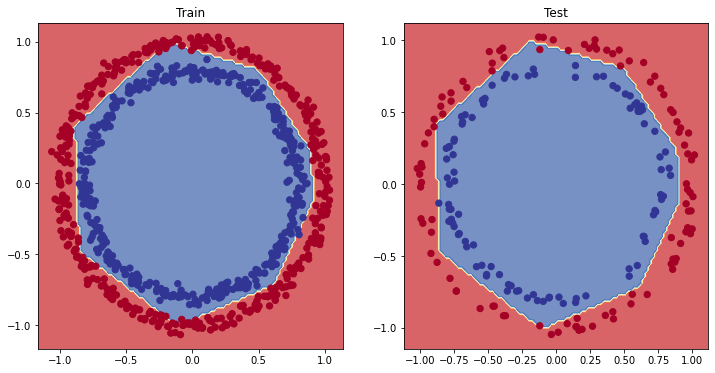

In [67]:
# Plot the decison boundaries for the training  and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_12, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_12, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods

Alongside visualiying our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)


In [68]:
# Check the accuracy of our model

loss, accuracy = model_12.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 8ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.057401809841394424
Model accuracy on the test set: 99.00%


How about a confusion matrix?

In [71]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_12.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 5ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [72]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [73]:
y_preds[:10]

array([[9.8526543e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622897e-01],
       [1.8126909e-02],
       [9.6829069e-01],
       [1.9746717e-02],
       [9.9967164e-01],
       [5.6458672e-04]], dtype=float32)

oops ... looks like our predictions array has come out in **predicition probability** form ... the standard output from the sigmoid (or softmax) activation functions.


In [74]:
# Convert predicition probability to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [75]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)